<a href="https://colab.research.google.com/github/Anand11500/Credit-Card-default-predication./blob/main/Copy_of_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -**      Anand Salunkhe


# **Project Summary -**

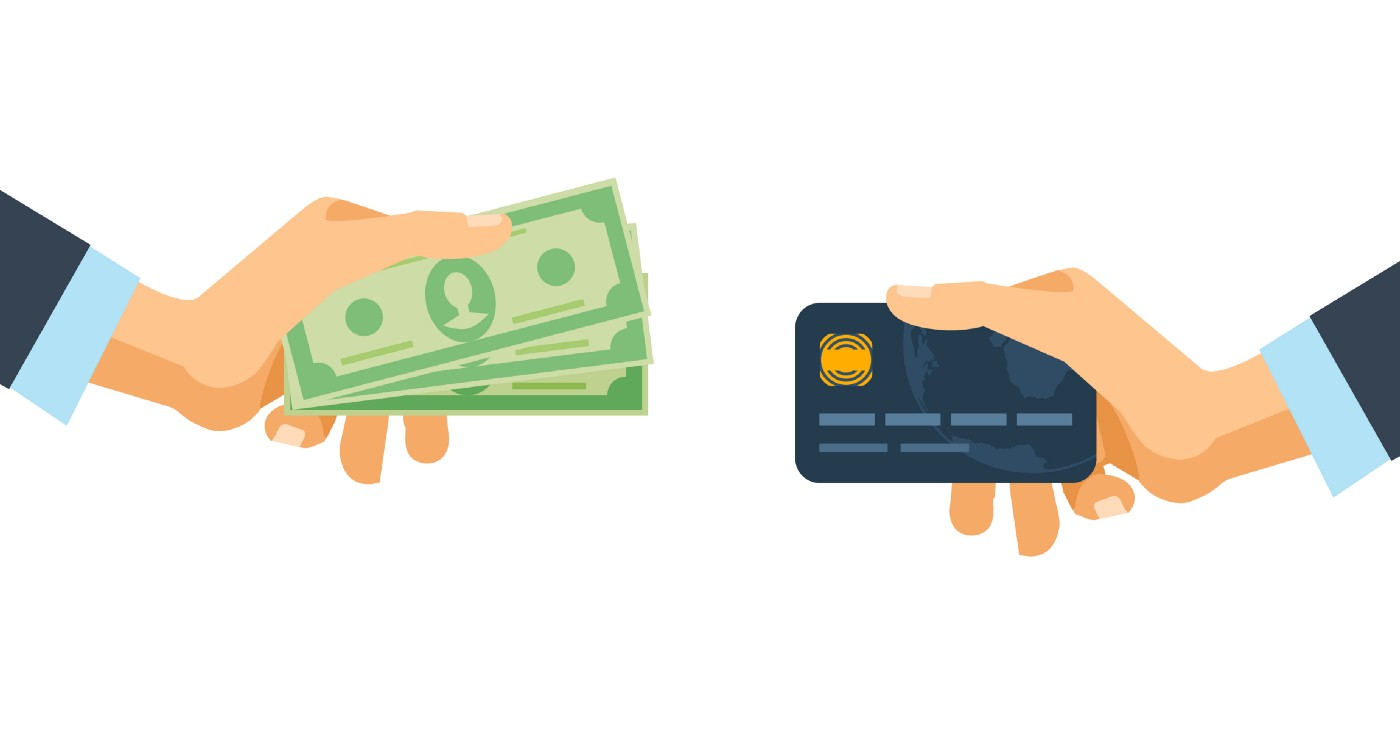

# **GitHub Link -**

https://github.com/Anand11500

# **Problem Statement**


This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card *payments*

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn import metrics

# Importing warning for ignore warnings 
import warnings
warnings.filterwarnings("ignore")

from prettytable import PrettyTable

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/capstone project1/default of credit card clients.xls')

### Dataset First View

To view the top five rows

In [ ]:
df.head()
     

To view the bottom five rows


In [ ]:
df.tail()

### Dataset Rows & Columns count

In [ ]:
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

there is no duplicate value persent into it.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()


*  The above dataset has 30001 rows and 25 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description 

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
*  X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
*  X2: Gender (1 = male; 2 = female).
*  X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
*  X4: Marital status (1 = married; 2 = single; 3 = others).
*  X5: Age (year).
*  X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
*  X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
*  X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Droping the unnamed column 
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
# Write your code to make your dataset analysis ready.
df.columns

In [ ]:
# creating list of columns name for renaming data frame column names
columns = ['Limit_bal','Gender','Education','Marital_status','Age','Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May',
           'Repayment_April','Sep_Bill','Aug_Bill','July_Bill','June_Bill','May_Bill','Apr_Bill','Pay_Sep','Pay_Aug','Pay_July','Pay_June','Pay_May','Pay_April','Defaulter'] 

In [ ]:
# replace column name with columns list
df.set_axis(columns, axis=1, inplace=True)

In [ ]:
# droping the axis 0
df=df.drop(0,axis=0).reset_index(drop=True)

In [ ]:
df.columns

In [ ]:
# Converting all cumns from Object to int 
for i in df.columns:
  df[i]=df[i].astype('int')


In [ ]:
df.info()

### **Categorical Features:**

**SEX:**

In [ ]:
# converting Gender 1 & 2 value in Male & Female for better understanding  
df['Gender'] = df['Gender'].apply(lambda x:'Male'  if x == 1 else 'Female')

**Education**

In [ ]:
# Value count of Education Column
df.Education.value_counts()

In data given values are 1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them to others

In [ ]:
df['Education']=df['Education'].apply(lambda x :'graduate' if x==1 else ('university' if x==2 else ('high school' if x==3  else 'others')))

**marriage**:

In [ ]:
df.Marital_status.value_counts()

In [ ]:
#The given values are 1 = married; 2 = single; 3 = others so 0 is not given in data, we include them on others

df['Marital_status']=df['Marital_status'].apply(lambda x: "married" if x==1 else ("single" if x==2 else 'others'))

In [ ]:
# visualizing the Age column for better understanding with histplot
sns.histplot(df['Age'])

In [ ]:
# we are using Bining in Age column
df['Age_group'] = pd.cut(df.Age, bins=[20,25,30,35,40,45,50,55,60,80],labels=['21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61 and Above'])

In [ ]:
#value counts of all Repayments status Columns 
for i in df[['Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May','Repayment_April']].columns:
  print(df[i].value_counts())

In [ ]:
# Defining function for all Repayments status value which is less than 0, consider as 0
def repaymentsstatus(delay):
    if delay <= 0:
      return 0
    else:
      return delay

In [ ]:
# Apply function on Repayments status columns
for i in df[['Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May','Repayment_April']].columns:
  df[i]=df[i].apply(repaymentsstatus)

In [ ]:
df=df[~((df['Repayment_April']==0) & (df['Repayment_May']==0) & (df['Repayment_June']==0) & (df['Repayment_July']==0) & (df['Repayment_August']==0) & (df['Repayment_September']==0) & (df['Defaulter']==1))]

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

# Dependant Column Value C
df.Defaulter.value_counts()

In [ ]:
#visualizing dependent variable
plt.figure(figsize=(10,8),dpi=80)
sns.countplot(x='Defaulter',data=df,palette='Set1')

We can see that we have quite imbalance dataset

##### 1. Why did you pick the specific chart?

Count plot shows the frequency counts of values for the different levels of a categorical or nominal variable

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, there are 23364 customers that are not deafulter

On other hand, 4302 customers are defaulter

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Customer defaulter is often referred to as customer who is not able to repay thier debt. Credit card companies often use customer defaulter as a key business metrics to predict the number of customers that will default in repaying their debt. Defaulter is significant in the credit industry because it directly affects the financial status of the service provider.`

#### Chart - 2

In [ ]:
categorical_variable = df[['Gender','Education','Marital_status','Age_group']]

In [ ]:
# Analysing the distribution of categorical variables in the dataset
for i in categorical_variable:
  plt.figure(figsize=(10,5))
  p = sns.countplot(x=i,data=df,hue="Defaulter", palette="muted")
  plt.xlabel(i)
  plt.title(i+' distribution')
  plt.show()

1.More number of credit defaulters are female.

2.More number of credit defaulters are university students followed by Graduates and High school students.

3.People who have marital status single have less default payment wrt married status people.

4.The people of age group 26-40 year old are more likely to get default.

#### Chart - 4

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(15,7))
sns.boxplot( x='Education',y='Limit_bal',data=df )

##### 1. Why did you pick the specific chart?

As we know, Box plots give a good graphical image of the concentration of the data. They also show how far the extreme values are from most of the data. So through this we can know higher credit limit.

##### 2. What is/are the insight(s) found from the chart?

From the boxplot, we can see that customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.

#### Chart - 6

In [ ]:
numerical_cols= ['Limit_bal','Repayment_September', 'Repayment_August',
       'Repayment_July', 'Repayment_June', 'Repayment_May', 'Repayment_April',
       'Sep_Bill', 'Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill',
       'Apr_Bill', 'Pay_Sep', 'Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May',
       'Pay_April']

In [ ]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in numerical_cols:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()


In this graph the dataset have all column check the density and mean and median and the mean colour is magenta and median colour is cyan. :

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [ ]:
# performing the independant t test on numerical varialbe
import scipy.stats as stats

# make a dataframe
tstats_df= pd.DataFrame()

# run a loop for all numerical variable
for i in numerical_cols:
  tstats= stats.ttest_ind(df.loc[df['Defaulter']==1,i],df.loc[df['Defaulter']==0,i])
  temp= pd.DataFrame([i,tstats[0],tstats[1]]).T
  temp.columns=['Variable Name','T-statstic','P-value']
  tstats_df=pd.concat([tstats_df,temp],axis=0,ignore_index=True)

tstats_df=tstats_df.sort_values(by='P-value').reset_index(drop=True)
tstats_df


Here our level of significance(alpha ) is 0.05. we got variable May_bill, July_bill, June_bill, which are not significance so we reject the null hypothesis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
df.isnull().sum()

There is no missing value present in it

### 2. Handling Outliers

In [ ]:
# Visualizing the outlier
plt.figure(figsize=(10,5))
sns.boxplot(x='Defaulter',hue='Education', y='Limit_bal',data=df )

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Defaulter',hue='Marital_status', y='Limit_bal',data=df)

In [ ]:
# Take a close look at the outlier
# The observations from other columns indicate that this was just a customer who has an excellent payment history
# Therefore it should be considered as a valid data

outliers = df.loc[df['Limit_bal']>900000]
outliers

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Using One hot encoding on categorical features and storing 
df = pd.get_dummies(df,columns =['Gender','Education','Marital_status','Age_group'])

One hot encoding technique is used here as we were having categorical features.

## Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
X =df.drop(columns=['Defaulter','Age'])
y =df['Defaulter']

### 9. Handling Imbalanced Dataset

In [ ]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(df.Defaulter.value_counts())
print(" ")
# Dependant Variable Column Visualization
df['Defaulter'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Non-Defaulter(%)','Defaulter(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [ ]:
# Handaling imbalance dataset using SMOTE

#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

I have used SMOTE (Synthetic Minority Over-sampling technique) for balanced the 85:15 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE.

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method.

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm.

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancinmg the dataset.

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# train test spilt data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=0)

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
clf.fit(X_train, y_train)

In [ ]:
# Checking the coefficients
clf.coef_

In [ ]:
# Checking the intercept value
clf.intercept_

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#  confusion matrix for train 
labels = ['Non_Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***